In [15]:
import osmnx as ox
import networkx as nx
import random

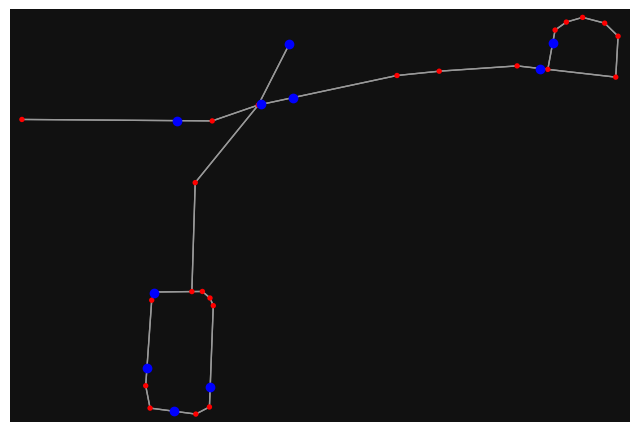

In [39]:
location_point = (33.299896, -111.831638)
G = ox.graph_from_point(location_point, dist=100, simplify=False)



In [40]:
weightID = "length"
number_of_nodes = 10
edge_weights = nx.get_edge_attributes(G, weightID)
#edge_oneway = nx.get_edge_attributes(G, "oneway")
L = 0
for edge in G.edges:
    L = L + edge_weights[edge]/2
edge_weights_percentage = {k: v/L for k, v in edge_weights.items()}
random_draws = random.choices(list(G.edges), weights = list(edge_weights_percentage.values()), k = number_of_nodes)
new_x = []
new_y = []
for e in random_draws:
    u = e[0]
    v = e[1]
    rand_pecentage = random.uniform(0, 1)
    new_x.append(G.nodes[u]['x'] + (G.nodes[v]['x'] - G.nodes[u]['x']) * rand_pecentage)
    new_y.append(G.nodes[u]['y'] + (G.nodes[v]['y'] - G.nodes[u]['y']) * rand_pecentage)

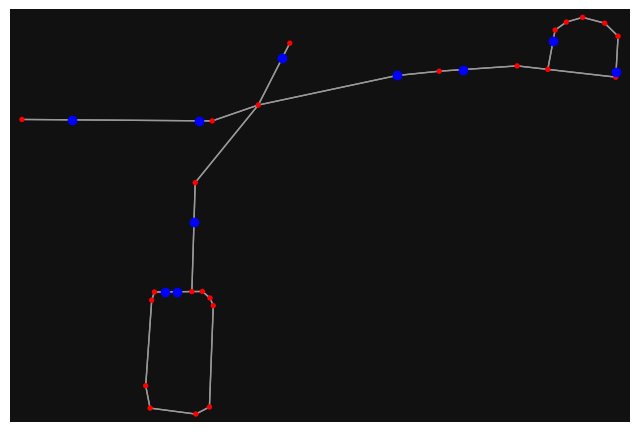

In [42]:
fig, ax = ox.plot_graph(G, node_color="r", show = False, close = False)

ax.scatter(new_x, new_y, c='blue')


In [29]:
random_draws[0][0]

7738027074